# Fire detection

In [1]:
from utils import *
from skimage import data
from skimage.color import rgb2lab, lab2lch
import numpy as np
import math

ModuleNotFoundError: No module named 'matplotlib'

## Fast and Efficient Method for Fire Detection Using Image Processing

### Pseudocódigo

The motivation for using CIE Lab* color space is because it is perceptually uniform color space

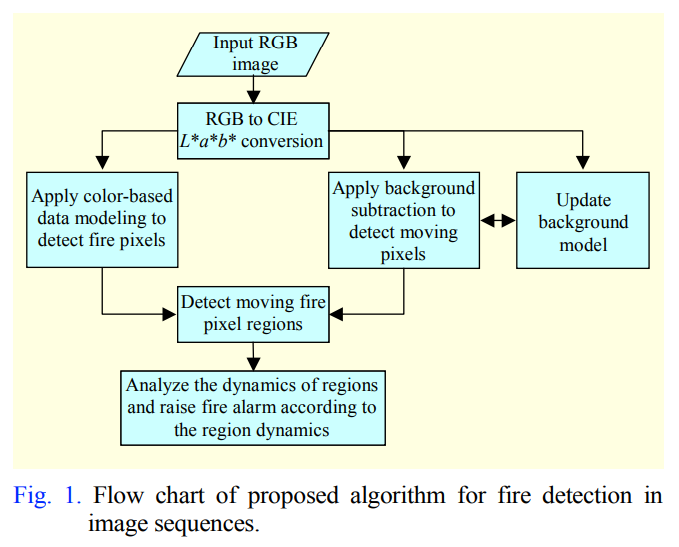

### Cie-Lab
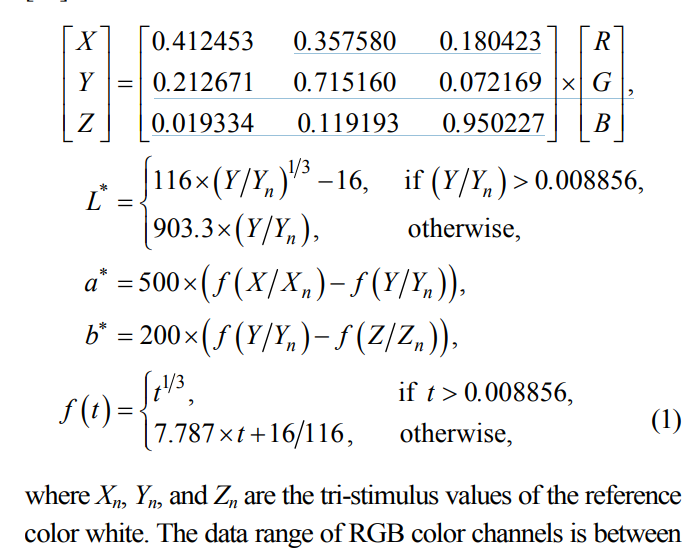

In [2]:
def f_lab(t):
    res = 0
    if t > 0.008856:
        res = t ** (1 / 3)
    else:
        7.787 * t + 16 / 116


def rgb_a_lab(r, g, b):
    matrix_lab = [
        [0.412453, 0.357580, 0.180423],
        [0.212671, 0.715160, 0.072169],
        [0.019334, 0.119193, 0.950227],
    ]
    rgb = [r, g, b]
    xyz = np.matmul(matrix_lab, rgb)
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    # tristimulus D65 std second obs
    # https://en.wikipedia.org/wiki/Standard_illuminant
    xn = 95.047
    yn = 100
    zn = 108.883
    a = 500 * (f_lab(x / xn) - f_lab(y / yn))
    b = 500 * (f_lab(y / yn) - f_lab(z / zn))
    l = 0
    if y / yn > 0.00856:
        116 * ((y / yn) ** 1 / 3) - 16
    else:
        903.3 * y / yn
    return (l, a, b)


# o usar img_lab = rgb2lab(img)

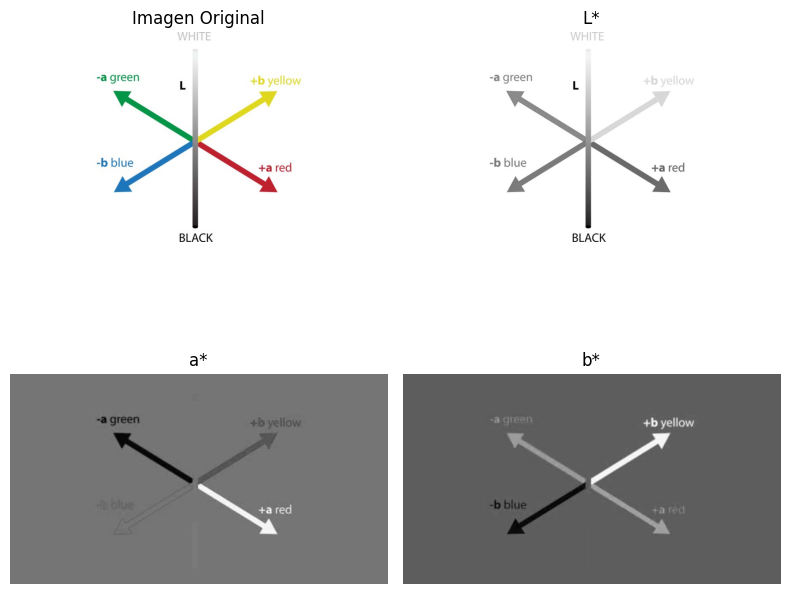

In [28]:
img = load_image("./images/CIELAB.jpg")

img_lab = rgb2lab(img)

l = img_lab[:, :, 0]
a = img_lab[:, :, 1]
b = img_lab[:, :, 2]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img)  # Imagen Compuesta
ax[1].imshow(l, cmap=plt.cm.gray)  # L*
ax[2].imshow(a, cmap=plt.cm.gray)  # a*
ax[3].imshow(b, cmap=plt.cm.gray)  # b*

for a in ax:
    a.axis('off')

ax[0].set_title('Imagen Original')
ax[1].set_title('L*')
ax[2].set_title('a*')
ax[3].set_title('b*')

fig.tight_layout()
plt.show()

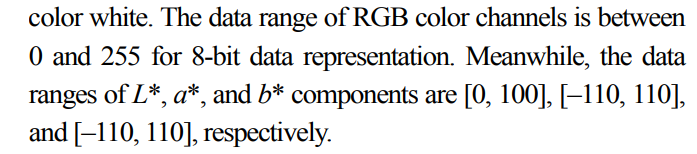

## Estadísticas Cie-lab

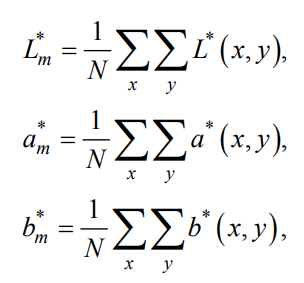

In [30]:
def statistical_ciel(img_lab):
    h, w, _ = img_lab.shape
    n = h * w
    ln = 0
    an = 0
    bn = 0
    for i in range(h):
        for j in range(w):
            ln += img_lab[i, j, 0]
            an += img_lab[i, j, 1]
            bn += img_lab[i, j, 2]

    ln = ln / n
    an = an / n
    bn = bn / n

    return (ln, an, bn)
    # o devolver
    # return (np.mean(img_lab[:,:,0]),np.mean(img_lab[:,:,1]),np.mean(img_lab[:,:,2]))
    # o quizás funciona
    # return np.mean(img, axis=2)

### R1, R2, R3, R4

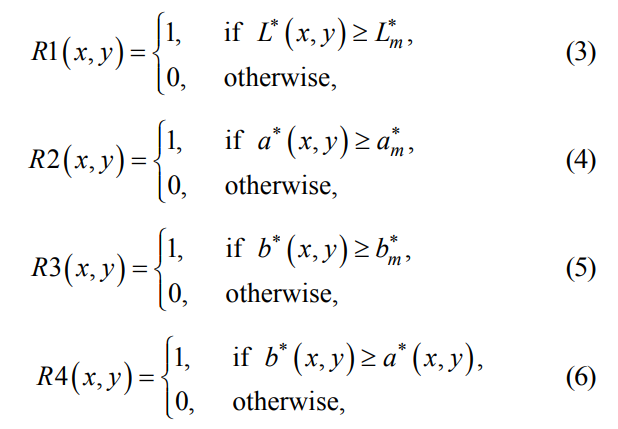

In [34]:
def binarizar(img, thres, index):
    h, w, _ = img.shape
    img_res = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if img[i, j, index] >= thres:
                img_res[i, j] = 1
    return img_res

def r1(img_lab, lm):
    return binarizar(img_lab, lm, 0)

def r2(img_lab, am):
    return binarizar(img_lab, am, 1)

def r3(img_lab, bm):
    return binarizar(img_lab, bm, 2)

def r4(img_lab):
    h, w, _ = img_lab.shape
    img_res = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if img_lab[i, j, 2] >= img_lab[i, j, 1]:
                img_res[i, j] = 1
    return img_res

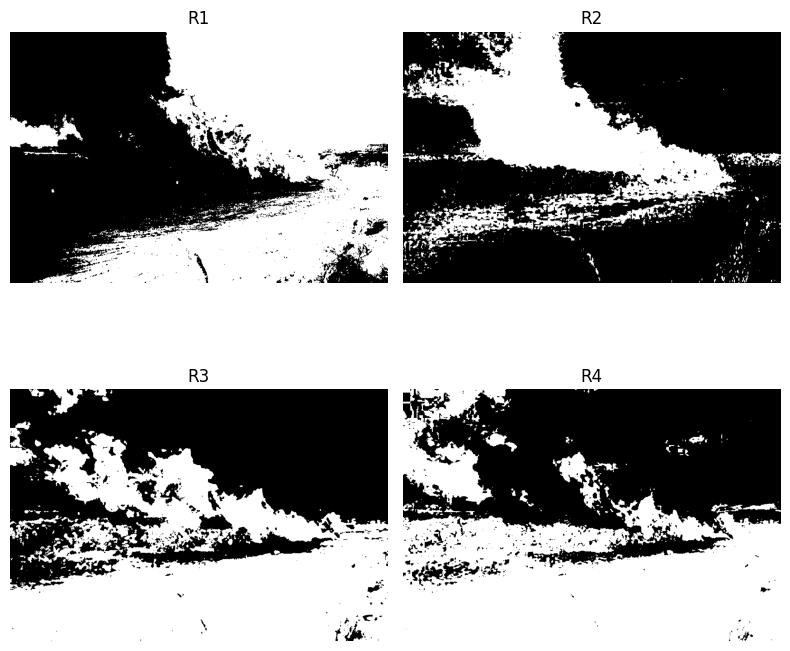

In [38]:
img = load_image("./images/sample2.jpg")
img_lab = rgb2lab(img)

lm, am, bm = statistical_ciel(img_lab)

r1_img = r1(img_lab, lm)
r2_img = r2(img_lab, am)
r3_img = r3(img_lab, bm)
r4_img = r4(img_lab)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(r1_img, cmap=plt.cm.gray)  # R1
ax[1].imshow(r2_img, cmap=plt.cm.gray)  # R2
ax[2].imshow(r3_img, cmap=plt.cm.gray)  # R3
ax[3].imshow(r4_img, cmap=plt.cm.gray)  # R4

for a in ax:
    a.axis('off')

ax[0].set_title('R1')
ax[1].set_title('R2')
ax[2].set_title('R3')
ax[3].set_title('R4')

fig.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(835.5), np.float64(556.5), np.float64(-0.5))

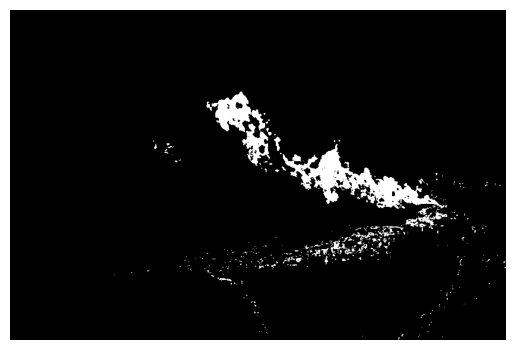

In [ ]:
and_img = np.logical_and(r1_img, r2_img)
and_img = np.logical_and(and_img, r3_img)
and_img = np.logical_and(and_img, r4_img)

plt.imshow(and_img, cmap=plt.cm.gray)
plt.axis("off")

### Función de probabilidad

A histogram of fire pixels is created for each of the 3 different color planes, that is, (L*-a*), (L*-b*), and (a*-b*).

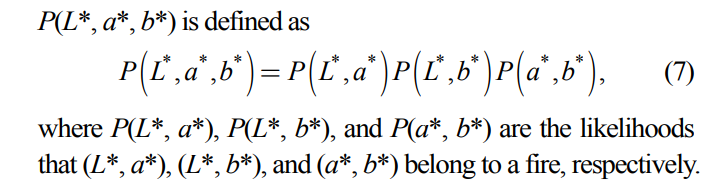

In [6]:
def p1(l, a):
    pass

def p2(l, b):
    pass

def p3(a, b):
    pass

def ps(vec_imgs,vec_masks):
  p_ab=np.zeros((24,24))
  p_la=np.zeros((24,24))
  p_lb=np.zeros((24,24))
  cant=len(vec_imgs)
  pxs=0

  for k in range(0,cant):
    img=vec_imgs[k]
    mask=vec_masks[k]
    h,w,_=img.shape
    for i in range(h):
      for j in range(w):
        if mask[i,j]:
          #aumentar en 1 la,lb,ab
          l=img[i,j,0]
          a=img[i,j,1]
          b=img[i,j,2]
          l_ind=math.floor(24*l/101)
          a_ind=math.floor(24*(a+110)/221)
          b_ind=math.floor(24*(b+110)/221)
          p_la[l_ind,a_ind]+=1
          p_lb[l_ind,b_ind]+=1
          p_ab[a_ind,b_ind]+=1
          px+=1

  p_la=p_la/px
  p_lb=p_lb/px
  p_ab=p_ab/px

  return (p_la,p_lb,p_ab)

def p_lab(l, a, b):
    return p1(l, a) * p2(l, b) * p3(a, b)

### R5

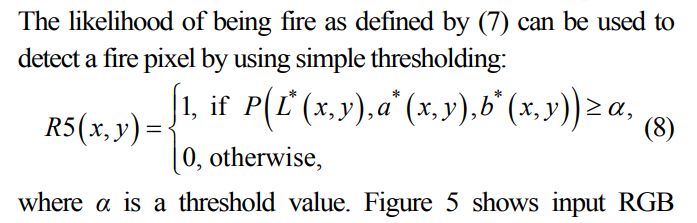

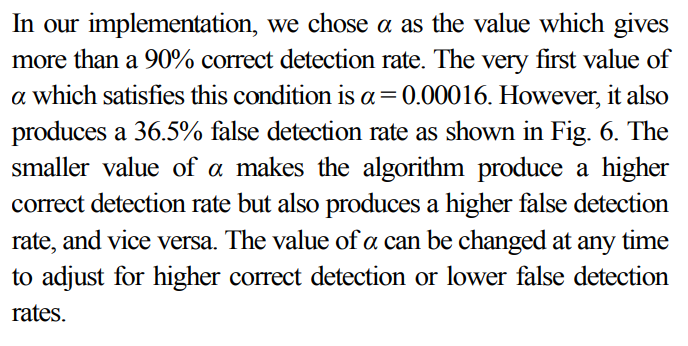

In [7]:
def r5(img_lab, alfa=0.00016):
    h, w, _ = img_lab.shape
    img_res = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            l = img_lab[i, j, 0]
            a = img_lab[i, j, 1]
            b = img_lab[i, j, 2]
            if p_lab(l, a, b) >= alfa:
                img_res[i, j] = 1

    return img_res

In [8]:
def final_rs(img_lab):
    h, w, _ = img_lab.shape
    ln, an, bn = statistical_ciel(img_lab)
    r_1 = r1(img_lab, ln)
    r_2 = r2(img_lab, an)
    r_3 = r3(img_lab, bn)
    r_4 = r4(img_lab)
    r_5 = r5(img_lab)

    img_res = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if r_1[i, j] + r_2[i, j] + r_3[i, j] + r_4[i, j] + r_5[i, j] == 5:
                img_res[i, j] = 1

    return img_res

## Movimiento

There are three main parts in moving pixel detection: frame/background subtraction, background registration, and moving pixel detection.

### Media, Sigma y Tau

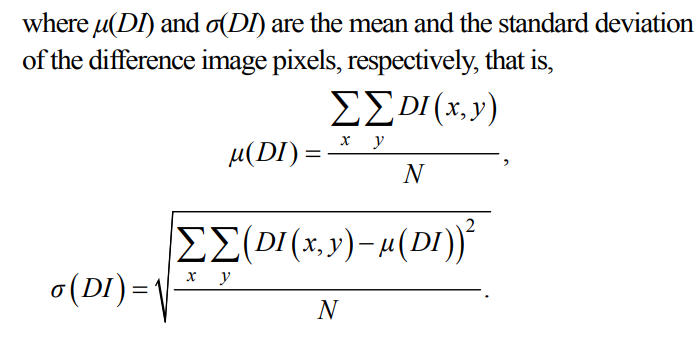

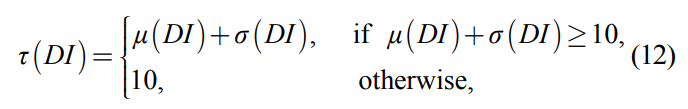

In [9]:
def mean_di(img_di):
    h, w = img_di.shape
    sum = 0
    n = h * w
    for i in range(h):
        for j in range(w):
            sum += img_di[i, j]

    return sum / n


def std_dev_di(img_di):
    mean = mean_di(img_di)
    h, w = img_di.shape
    sum = 0
    n = h * w
    for i in range(h):
        for j in range(w):
            sum += (img_di[i, j] - mean) ** 2

    return math.sqrt(sum / n)

In [10]:
# o versión fácil
def mean_di_np(img_di):
    return np.mean(img_di)


def std_dev_di_np(img_di):
    return np.std(img_di)

In [11]:
def tau(img_di):
    mean = mean_di(img_di)
    sigma = std_dev_di(img_di)
    if mean + sigma >= 10:
        res = mean + sigma
    else:
        res = 10
    return res

### Frame Difference

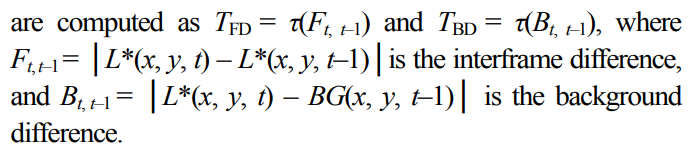

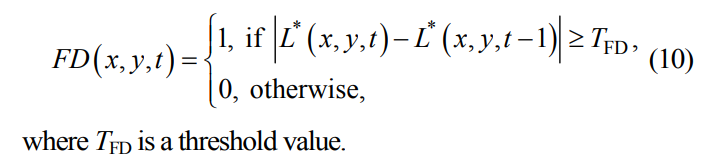

In [12]:
def frame_difference(img_lab_t, img_lab_t_ant, threshold_fd):
    h, w, _ = img_lab_t.shape
    img_fd = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if abs(img_lab_t[i, j, 0] - img_lab_t_ant[i, j, 0]) >= threshold_fd:
                img_fd = 1
    return img_fd


def frame_difference_dynamic_thres(img_lab_t, img_lab_t_ant):
    h, w, _ = img_lab_t.shape
    img_fd = np.zeros((h, w))
    dif_img = np.abs(img_lab_t[:, :, 0] - img_lab_t_ant[:, :, 0])
    thresh = tau(dif_img)
    for i in range(h):
        for j in range(w):
            dif = abs(
                img_lab_t[i, j, 0] - img_lab_t_ant[i, j, 0]
            )  # esto es dif_img[i,j] creo
            if dif >= thresh:
                img_fd = 1
    return img_fd

In [13]:
# este devuelve todos los frame diff para todos los ts
def frame_differences_dynamic_thres(vec_imgs):
    cant, h, w, _ = vec_imgs.shape
    fds = np.zeros((cant, h, w))

    for k in range(1, cant):
        img_fd = np.zeros((h, w))
        img = vec_imgs[k]
        img_ant = vec_imgs[k - 1]
        dif_img = np.abs(img[:, :, 0] - img_ant[:, :, 0])
        thresh = tau(dif_img)
        for i in range(h):
            for j in range(w):
                dif = abs(img[i, j, 0] - img_ant[i, j, 0])  # esto es dif_img[i,j] creo
                if dif >= thresh:
                    img_fd = 1
        fds[k] = img_fd

    return fds

### Stationary Index

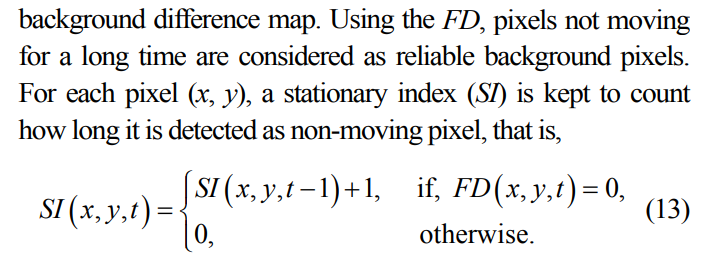

In [14]:
def stationary_index_v1(vec_imgs, k):
    cant = len(vec_imgs)
    img_0 = vec_imgs[0]
    h, w, _ = img_0.shape

    if k == 0:
        return np.zeros((h, w))
    else:
        si = np.zeros((h, w))
        fd = frame_difference_dynamic_thres(img[k], img[k + 1])
        si_ant = stationary_index_v1(vec_imgs, k - 1)
        for i in range(h):
            for j in range(w):
                if fd[i, j] == 0:
                    si[i, j] = si_ant[i, j] + 1

In [15]:
def stationary_indexes(vec_imgs):
    cant = len(vec_imgs)
    img_0 = vec_imgs[0]
    h, w, _ = img_0.shape
    sis = np.array(np.zeros((cant, h, w)))
    sis[0] = np.zeros((h, w))

    for k in range(1, cant - 1):
        fd = frame_difference_dynamic_thres(vec_imgs[k], vec_imgs[k - 1])
        si_ant = sis[k - 1]
        si = np.zeros((h, w))
        for i in range(h):
            for j in range(w):
                if fd[i, j] == 0:
                    si[i, j] = si_ant[i, j] + 1
        sis[k] = si

    return sis

### Background Difference

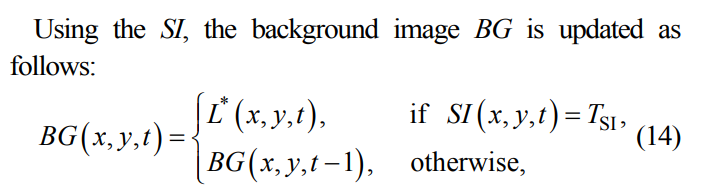

In [16]:
def background_images(vec_imgs, thres_si):
    cant = len(vec_imgs)
    img_0 = vec_imgs[0]
    h, w, _ = img_0.shape
    sis = stationary_indexes(vec_imgs)
    bgs = np.zeros((k, h, w))
    bgs[0] = np.zeros((h, w))

    for k in range(1, cant - 1):
        img = vec_imgs[k]
        bg = bgs[k - 1]
        for i in range(h):
            for j in range(w):
                if sis[k, i, j] == thres_si:
                    l = img[i, j, 0]
                    bg[i, j] = l
        bgs[k] = bg
    return bgs

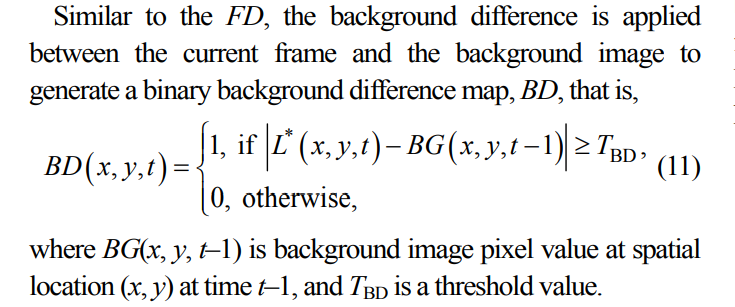

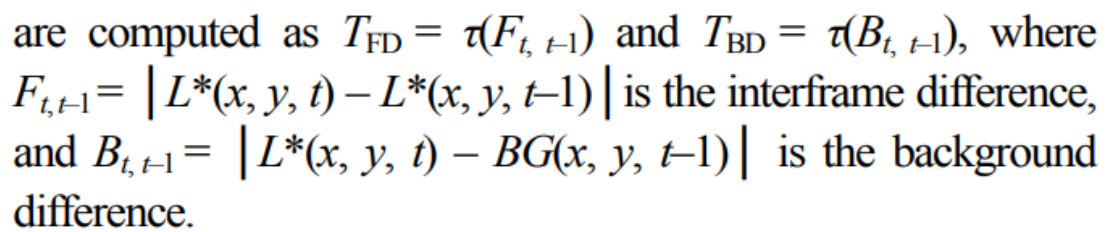

In [17]:
def background_difference(vec_imgs):
    cant, h, w, _ = vec_imgs.shape
    bds = np.zeros((cant, h, w))
    bgs = background_images(vec_imgs, 10)

    for k in range(1, cant - 1):
        img = vec_imgs[k]
        bg_ant = bgs[k - 1]
        dif = np.abs(img[:, :, 0] - bg_ant)
        thresh = tau(dif)
        bd = np.zeros((h, w))
        for x in range(h):
            for y in range(w):
                if dif[x, y] >= thresh:
                    bd[x, y] = 1
        bds[k] = bd
    return bds

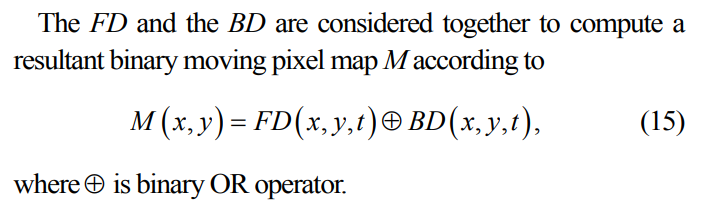

In [18]:
def moving_pixel_map(vec_imgs):
    cant, h, w, _ = vec_imgs.shape
    bds = background_difference(vec_imgs)
    fds = frame_differences_dynamic_thres(vec_imgs)
    ms = np.zeros((cant, h, w))

    for k in range(cant):
        fd = fds[k]
        bd = bds[k]
        m = np.zeros((h, w))
        for i in range(h):
            for j in range(w):
                if fd[i, j] or bd[i, j]:
                    m[i, j] = 1
        ms[k] = m

    return ms

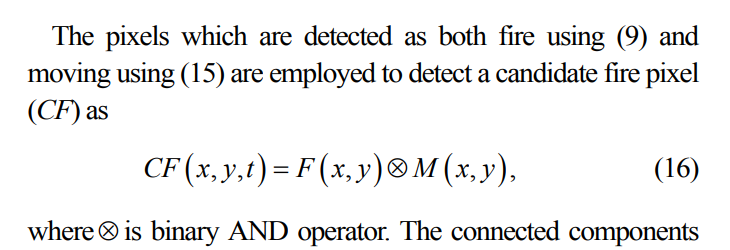

In [19]:
def candidate_fire_pixels_vec(vec_imgs):
    cant, h, w, _ = vec_imgs.shape
    cfs = np.zeros((cant, h, w))
    ms = moving_pixel_map(vec_imgs)
    fs = np.zeros((cant, h, w))

    for k in range(cant):
        f = final_rs(vec_imgs[k])
        fs[k] = f

    for k in range(cant):
        cf = np.zeros((h, w))
        f = fs[k]
        m = ms[k]
        for i in range(h):
            for j in range(w):
                cf[i, j] = f[i, j] and m[i, j]
        cfs[k] = cf

    return cfs

In [ ]:
def en_rango(x,y,h,w):
  return 0<=x and x<h and 0<=y and y<w

def componentes_conexas(img_cf):
  h,w=img_cf.shape
  posiciones_con_uno=[]
  componentes_conexas=[] #O(t) lista de listas
  #cant_elementos_comp_conexas=[] #NO(t) lista de números
  indices_px_unos={}
  

  for x in range(h):
    for y in range(w):
      if img_cf[x,y]:
        posiciones_con_uno.append((x,y))
        indices_px_unos[(x,y)]=len(posiciones_con_uno)-1
  
  cant=len(posiciones_con_uno)
  componente_conexa_correspondiente=np.full(cant,-1)
      
  for k in range(cant):
    px,py=posiciones_con_uno[k]
    if componente_conexa_correspondiente[k]==-1:
      #crear componente conexa
      componentes_conexas.append([(px,py)])
      comp_conexa=len(componentes_conexas)-1
    else:
      comp_conexa=componente_conexa_correspondiente[k]

    #mirar vecinos y asignar componente conexa correspondiente
    for vx in range(max(px-1,0),min(px+2,h)):
      for vy in range(max(py-1,0),min(py+2,w)):
        if img_cf[vx,vy] and vx!=px and vy!=py:
          idx=indices_px_unos[(vx,vy)]
          componente_conexa_correspondiente[idx]
          componentes_conexas[comp_conexa].append((vx,vy))

  
  return componentes_conexas

In [ ]:
def componente_conexa_en_el_tiempo(img_cf,componentes_conexas):
  h,w=img_cf.shape
  posiciones_con_uno=[]
  indices_px_unos={}
  componentes_conexas_modificadas=[]

  for x in range(h):
    for y in range(w):
      if img_cf[x,y]:
        posiciones_con_uno.append((x,y))
        indices_px_unos[(x,y)]=len(posiciones_con_uno)-1
  
  cant=len(posiciones_con_uno)
  componente_conexa_correspondiente=np.full(cant,-1)

  for comp conexa
    dor elem comp conexa
      if esta definida

  
  return componentes_conexas

In [ ]:
def cgo(componentes_conexas,vec_video):
    cant_v=len(vec_video)
    cant_cc=len(componentes_conexas)
    cgos=np.zeros(cant_v) #contador de movimiento por componente conexa
    n_elem_comp=np.zeros((cant_v,cant_cc))

    #componentes_conexas es lista de: lista de posiciones [c1,c2....,cn]-> ci->[px1....pxm]
    for k in range(cant_v):
        img=vec_video[k]
        #img cant elementos de c/comp conexa
        #-----



    
    pass

In [ ]:
def d_metric(cgo,cgo_1s_ant,fps):
    return (cgo-cgo_1s_ant)/fps